In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
cars = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.select_dtypes(include=['float64', 'int64'])

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
cars.describe(include = 'all')
#It is a univariate type
#we use it to know about the distribution using q1,q2,q3,q4
#By looking at the min,q1,q2,q3,max of the car price we can say it is right skewed
# include = 'all' also puts the info about the categorical features
# describe gives us the summary statistics
# The mean for 'carname', 'fueltype' is Nan bcoz they are categorical types

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,peugeot 504,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [8]:
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [9]:
cars[['peakrpm']] = cars[['peakrpm']].astype('float')
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm             float64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [10]:
# here we dont have the object type features
cars.corr().price.sort_values()

highwaympg         -0.697599
citympg            -0.685751
car_ID             -0.109093
peakrpm            -0.085267
symboling          -0.079978
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
boreratio           0.553173
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

In [11]:
# symboling:-2(least risky) to +3 (most risky)
# Most cars are 0,1,2
cars['symboling'].astype('category').value_counts()

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

In [12]:
cars['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [13]:
#aspiration: An (internal combustion) engine property showing
#whether the oxygen intake is through standard(atm pressure)
#or through turbocharging(pressurised oxygen intake)
cars['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [14]:
#drivewheel:frontwheel, rarewheel or four-wheel drive
cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


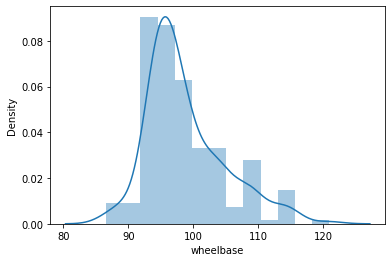

In [15]:
#wheelbase: distance between centre of front and rarewheels
#To check distribution of feature
# here it is lightly right skewed
sns.distplot(cars['wheelbase'])
plt.show()

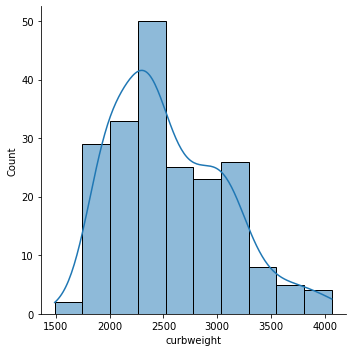

In [16]:
#curbweight: weight of car without occupants or baggage
sns.displot(cars['curbweight'], kde = True)
plt.show()

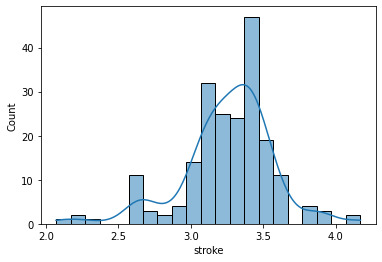

In [17]:
# stroke: volume of the engine (the distance traveled by the piston in each cycle)
sns.histplot(cars['stroke'], kde = True)
plt.show()

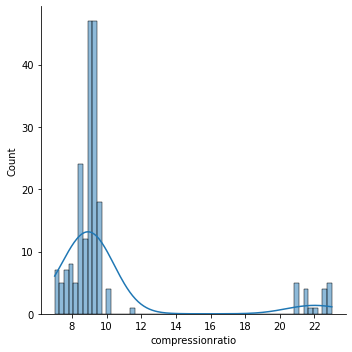

In [18]:
# compression ratio: ratio of volume of compression chamber
# at largest capacity to least capacity
sns.displot(cars['compressionratio'], kde = True)
plt.show()

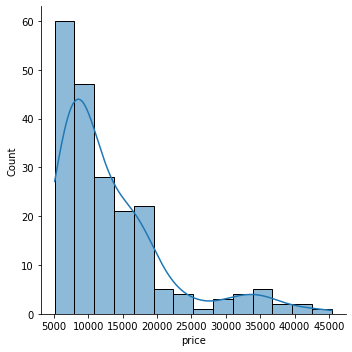

In [19]:
# target variable: price of car
sns.displot(cars['price'], kde = True)
plt.show()

Data Exploration

To peform linear regression, the (numeric) target variable should be linearly related to atleast one another numeric variable. Let's see whether that's true in this case.

We'll first subset the list of all(independent) numeric variables, and then make a pairwise plot.

In [20]:
# all numeric (float and int) variables in the dataset
cars_numeric = cars.select_dtypes(include=['float64', 'int'])
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,peakrpm,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000.0,13495.0
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000.0,16500.0
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,5000.0,16500.0
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,5500.0,13950.0
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,5500.0,17450.0


Here, although the variable symboling is numeric(int), we'd rather treat it as categorical since it has only 6 discrete values. Also, we do not want 'car_ID'

In [21]:
# dropping symboling and car_ID
# cars_numeric = cars_numeric.drop(['symboling', 'car_ID'], axis=1)
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,peakrpm,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000.0,13495.0
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000.0,16500.0
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,5000.0,16500.0
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,5500.0,13950.0
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,5500.0,17450.0


Let's now make a pairwise scatter plot and observe linear relationships

<Figure size 1440x720 with 0 Axes>

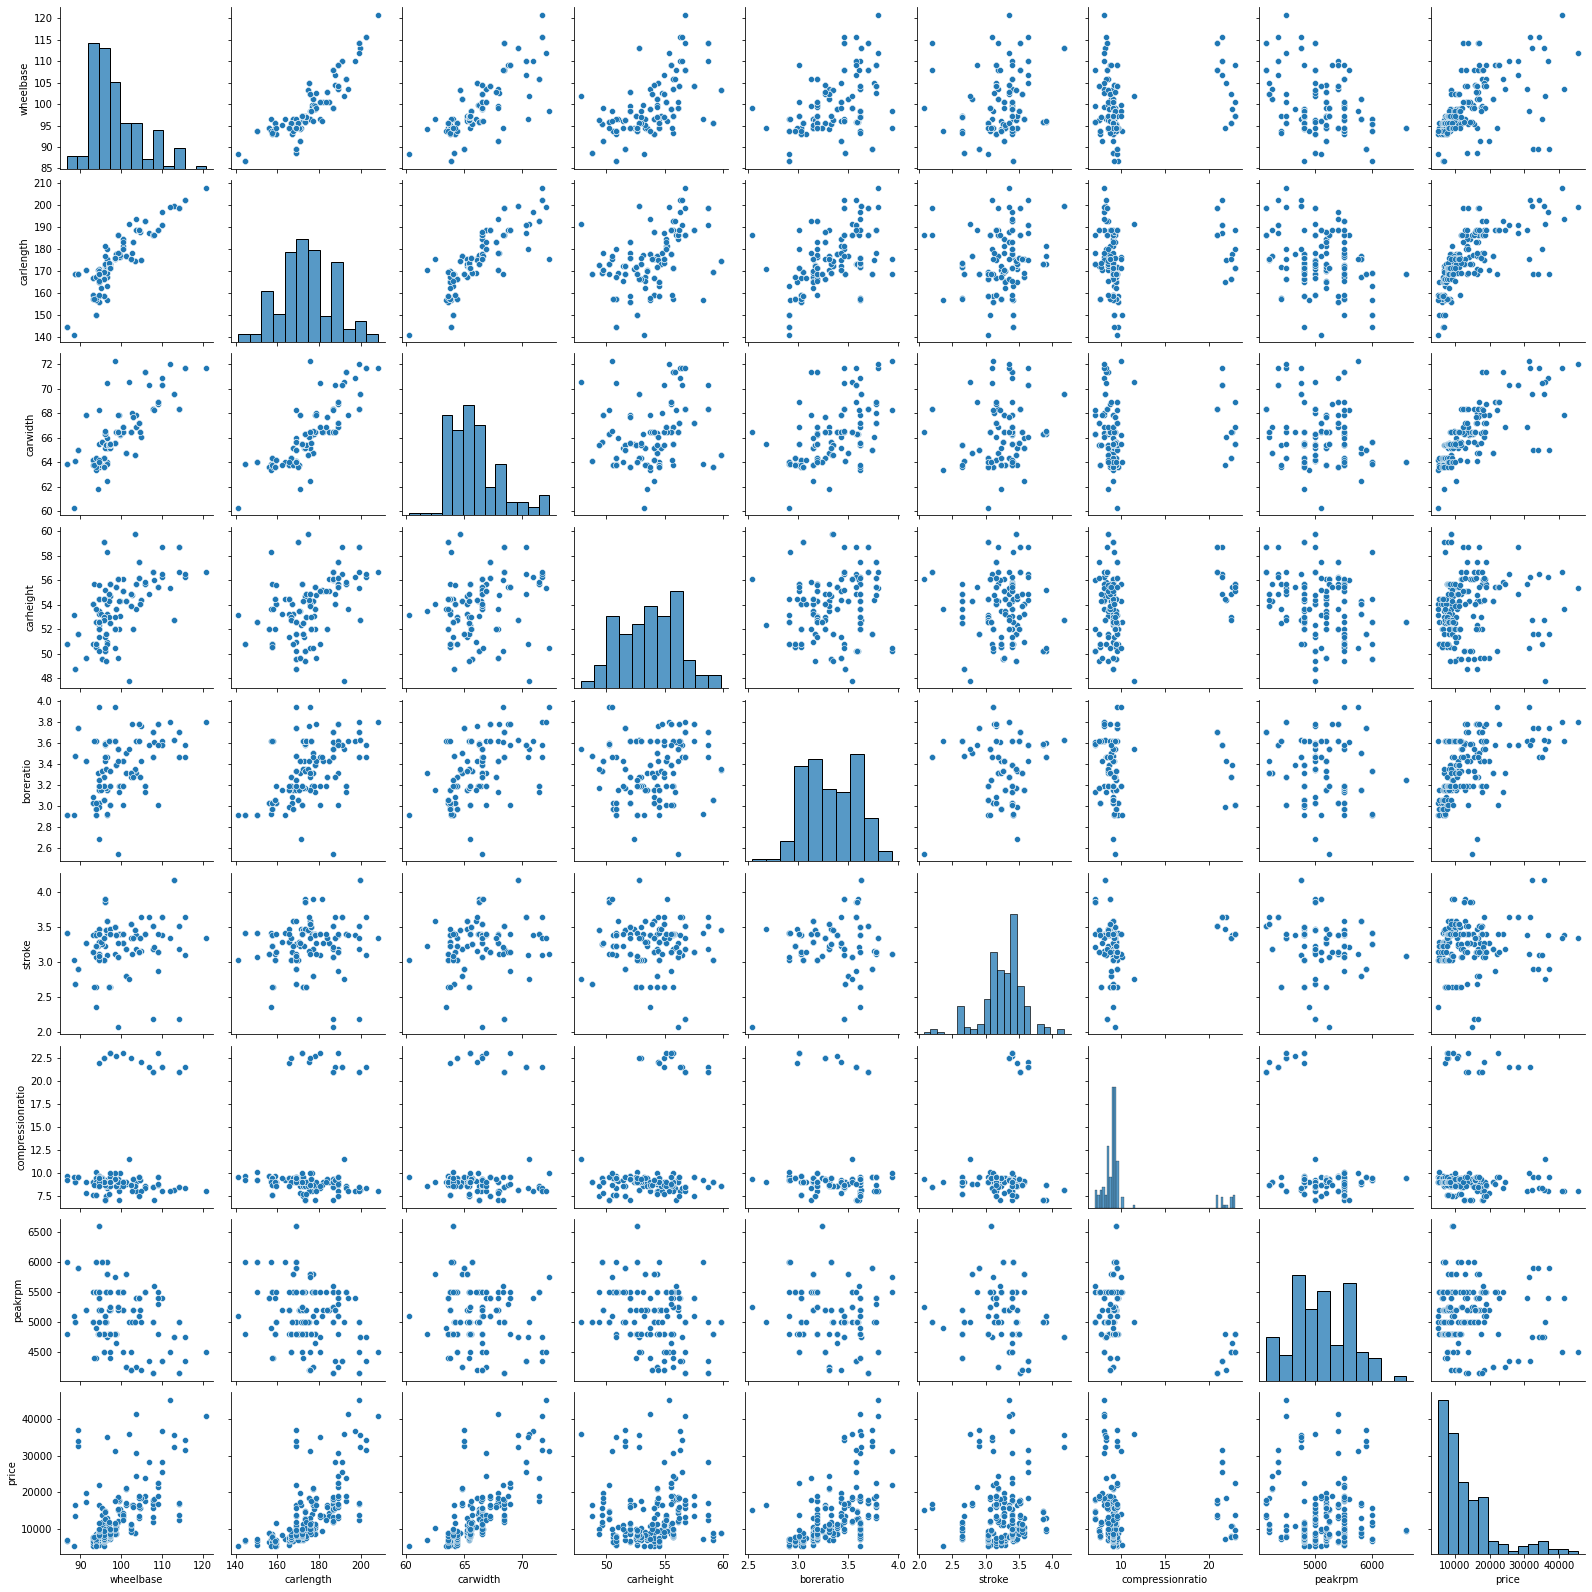

In [22]:
# pairwise scatter plot

plt.figure(figsize=(20,10))
sns.pairplot(cars_numeric)
plt.show()

So in this pairplot, the last row gives us the scatterplot of independent features with the target feature(price).

It gives us the pairwise bivariate distributions and the diagonals are univariate distributions

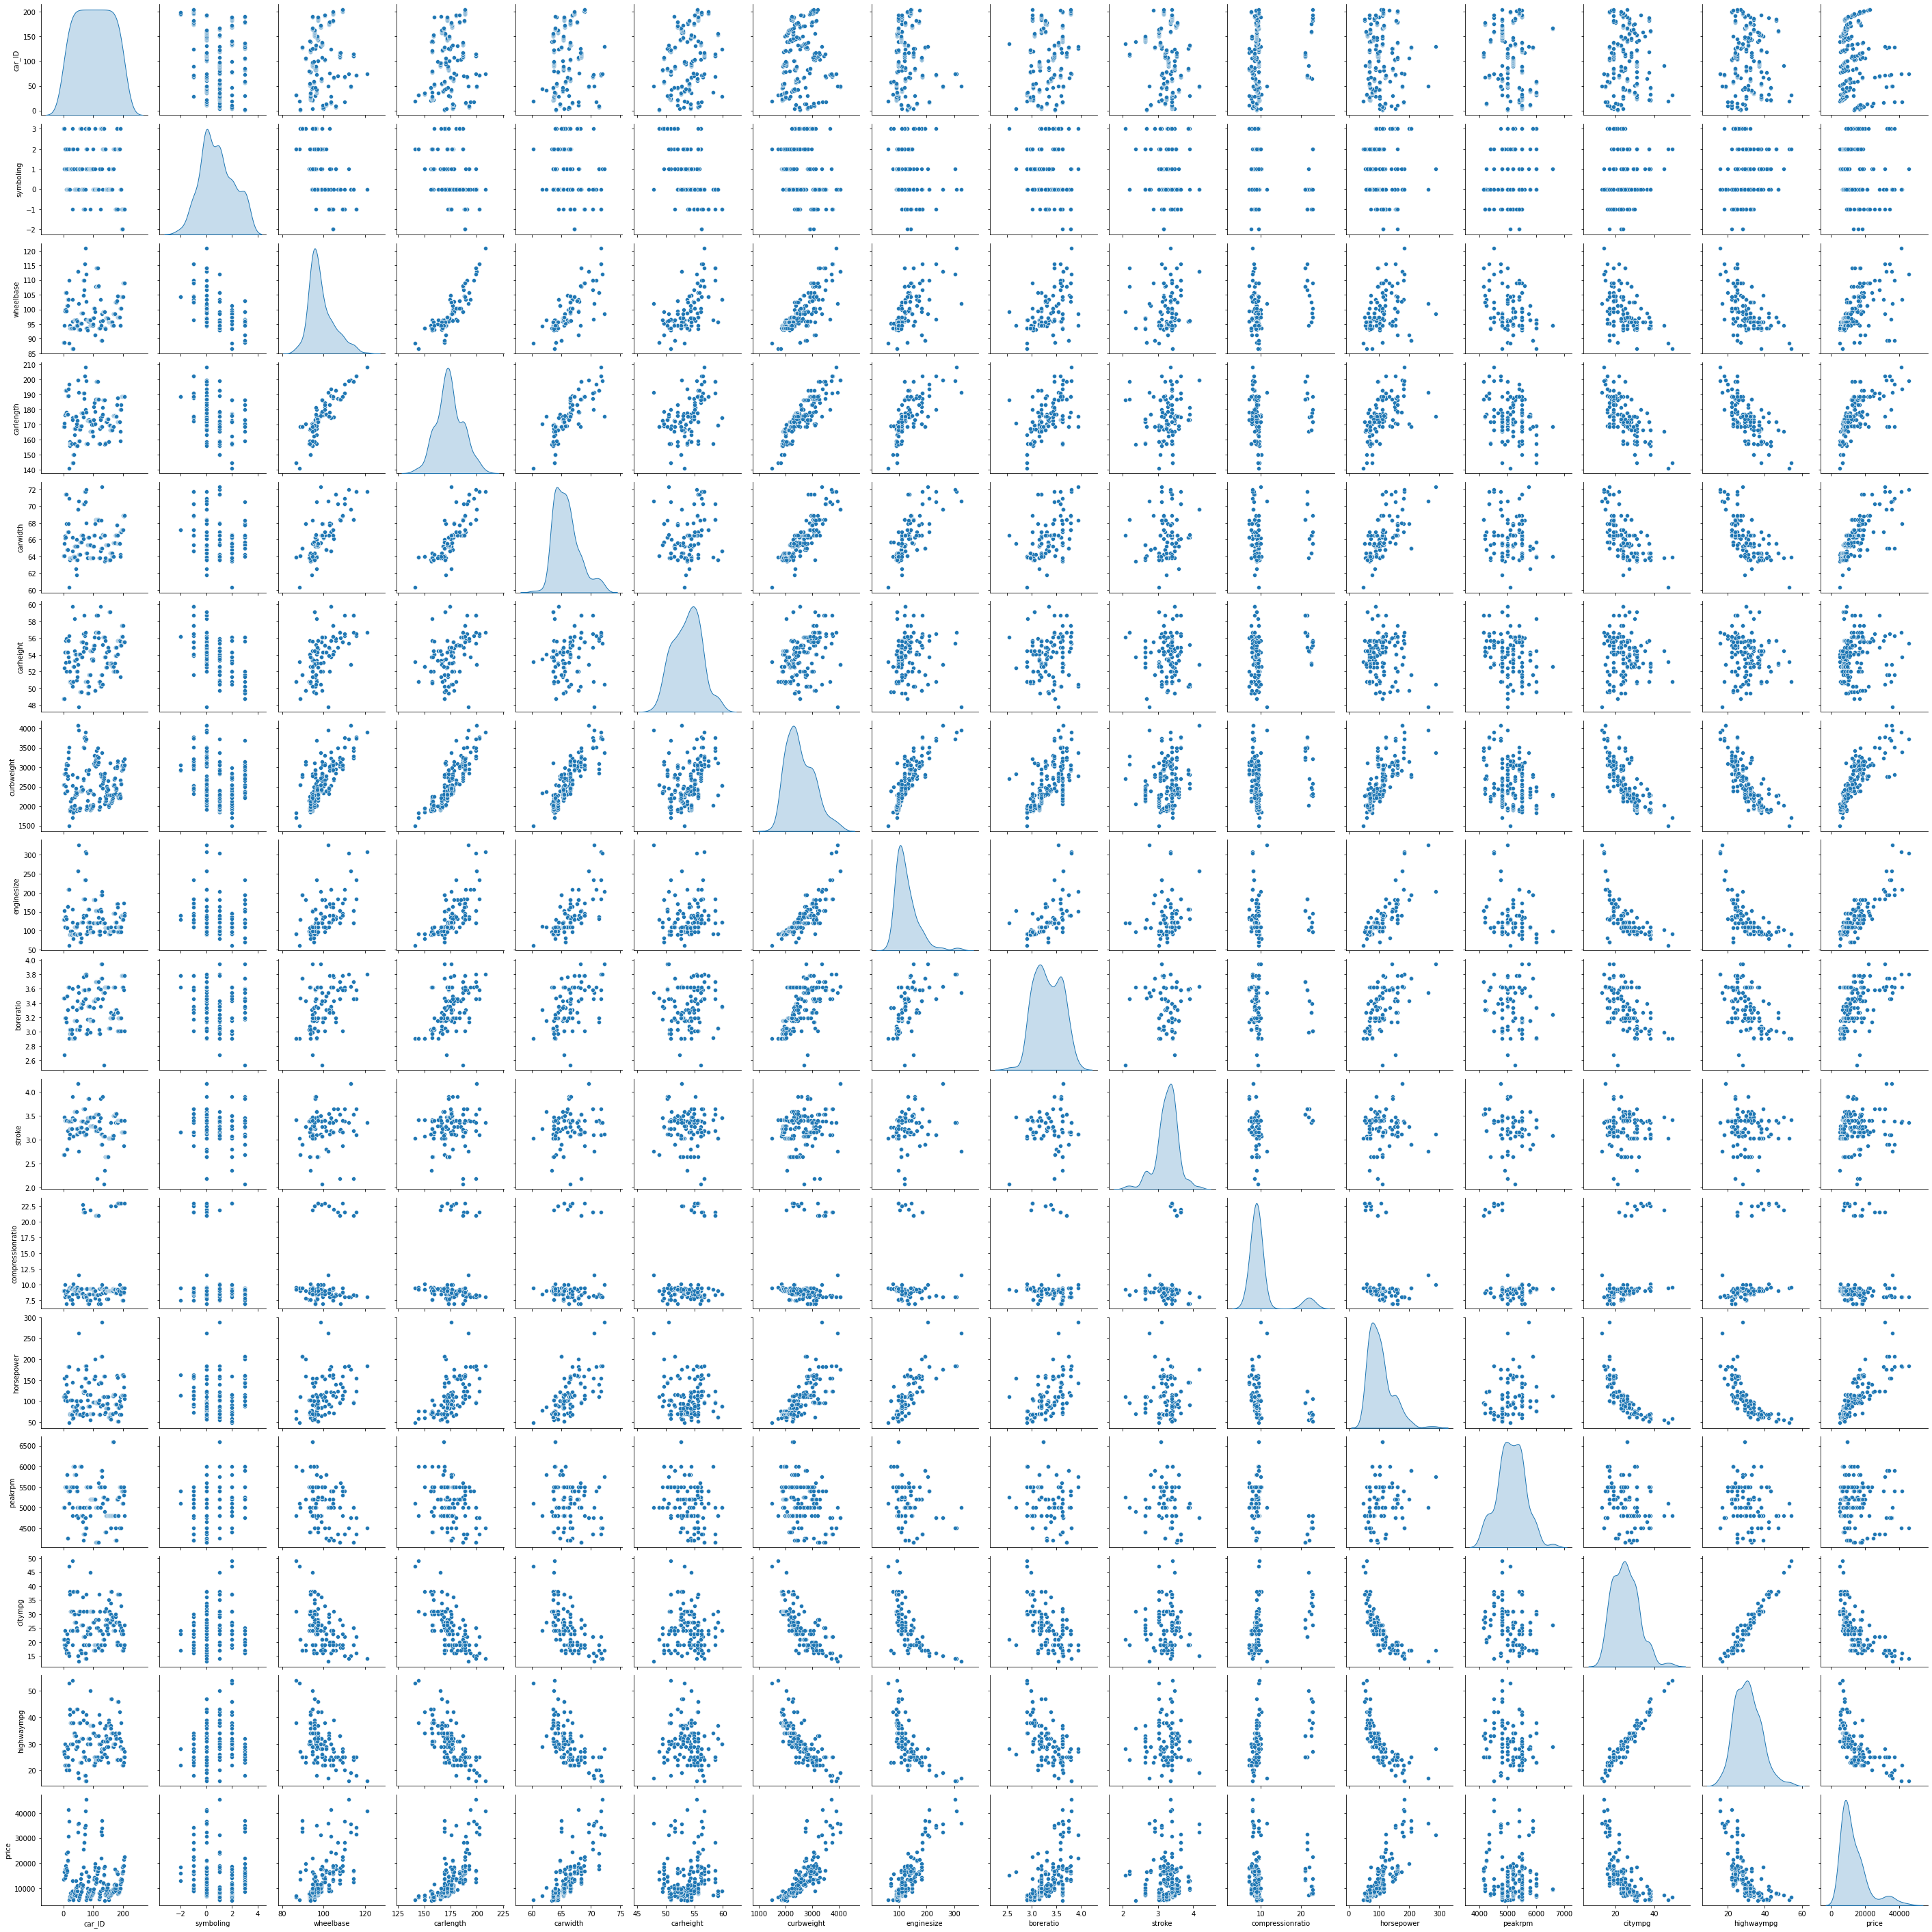

In [23]:
sns.pairplot(cars, diag_kind='kde')

This is quite hard to read and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot

In [24]:
# correlation matrix
cor = cars_numeric.corr()
cor

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,peakrpm,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.488750,0.160959,0.249786,-0.360469,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.606454,0.129533,0.158414,-0.287242,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.559150,0.182942,0.181129,-0.220012,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.171071,-0.055307,0.261214,-0.320411,0.119336
boreratio,0.488750,0.606454,0.559150,0.171071,1.000000,-0.055909,0.005197,-0.254976,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,-0.055909,1.000000,0.186110,-0.067964,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.005197,0.186110,1.000000,-0.435741,0.067984
peakrpm,-0.360469,-0.287242,-0.220012,-0.320411,-0.254976,-0.067964,-0.435741,1.000000,-0.085267
price,0.577816,0.682920,0.759325,0.119336,0.553173,0.079443,0.067984,-0.085267,1.000000


Here we can find relation of price(our target feature) with independent features

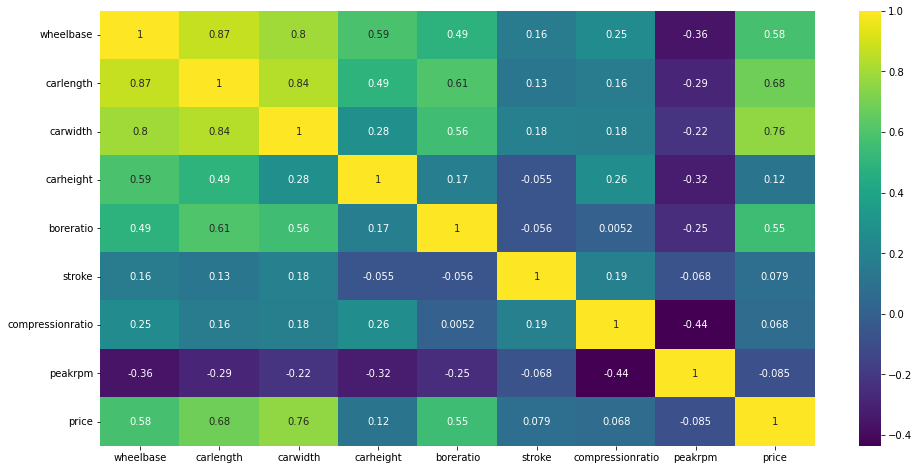

In [25]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

#heatmap
sns.heatmap(cor, cmap='viridis', annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of price with independent variables:

Price is highly(positively) correlated with wheelbase, carlength, curbweight, enginesize, horsepower (notice how all of these variables represent the size/weight/engine power of the car)

Price is negatively correlated to citympg and highwaympg(~0.70 approx). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower(think Maruti alto/swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

Correlation among independent variables:

Many independent variables are highly correlated(look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated

Thus, while  building the model, we'll have to pay attention to multicollinearity(especially linear models, such as linear and logistic regression, suffer more form multicollinearity).

2. DATA CLEANING
Let's now conduct some data cleaning steps.
We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except symboling, which should rather be a categorical variable(so that dummy variable are created for the categories)

Note that it can be used in the model as a numeric variable also.


In [26]:
# variable formats
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [27]:
# converting symboling to categorical
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [28]:
# Now we need to extract the company name from the column CarName
# CarName: first few entries
cars['CarName'][:30]

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
5                      audi fox
6                    audi 100ls
7                     audi 5000
8                     audi 4000
9           audi 5000s (diesel)
10                     bmw 320i
11                     bmw 320i
12                       bmw x1
13                       bmw x3
14                       bmw z4
15                       bmw x4
16                       bmw x5
17                       bmw x3
18             chevrolet impala
19        chevrolet monte carlo
20          chevrolet vega 2300
21                dodge rampage
22          dodge challenger se
23                   dodge d200
24            dodge monaco (sw)
25           dodge colt hardtop
26              dodge colt (sw)
27         dodge coronet custom
28            dodge dart custom
29    dodge coronet custom (sw)
Name: CarName, dtype: object

Notice that the carname is what occurs before a space, e.g. alfa-romero, audi, bmw, chevrolet etc.

Thus, we need to simply extract the string before a space. There are multiple ways to do that.

In [29]:
# Extracting carname

#Method 1: str.split() by space
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:30]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: CarName, dtype: object

In [30]:
# # Method 2:Use regular expressions
# import re

# # regex: any alphanumeric sequence before a space, may contain a hyphen
# p = re.compile(r'\w+-?\w+')
# carnames = cars['CarName'].apply(lambda x: re.findall(p, x)[0])
# print(carnames)

Lst's create a new column to store the company name and check whether it looks okay

In [31]:
# new column car_company
cars['car_company'] = carnames

In [32]:
cars['car_company']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: car_company, Length: 205, dtype: object

In [33]:
# look at all values
cars['car_company'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: car_company, dtype: int64

Notice that some car-company names are misspelled- vw and vokswagen should be volkswagen, porcshce should be porsche, toyouta should be toyota, Nissan should be nissan, maxda should be mazda etc.

This is a data quality issue, let's solve it.

In [34]:
cars['car_company'].loc[(cars['car_company'] == 'vw')]

189    vw
190    vw
Name: car_company, dtype: object

In [35]:
# replacing misspelled car_company names

#volkswagen
cars['car_company'].loc[(cars['car_company'] == 'vw') |
        (cars['car_company'] == 'vokswagen')] = 'volkswagen'

#porsche

cars.loc[cars['car_company'] == 'porcshce', 'car_company'] = 'porsche'

#toyota
cars.loc[cars['car_company'] == 'toyouta', 'car_company'] = 'toyota'

# nissan
cars.loc[cars['car_company'] == 'Nissan', 'car_company'] = 'nissan'

# mazda
cars.loc[cars['car_company'] == 'maxda', 'car_company'] = 'mazda'

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [36]:
cars['car_company'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [37]:
#porsche

cars.loc[cars['car_company'] == 'porcshce', 'car_company'] == 'porsche'

Series([], Name: car_company, dtype: bool)

The car_company variable looks okay now. Let's now drop the car name variable.

In [38]:
cars.drop('CarName', axis=1, inplace=True)

In [39]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [40]:
# outliers
cars.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Missing value and Outlier detection

In [41]:
cars.isnull().any()

car_ID              False
symboling           False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
car_company         False
dtype: bool

No missing values in any columns

In [42]:
# car_df_final_imp = cars.fillna(cars.median())

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


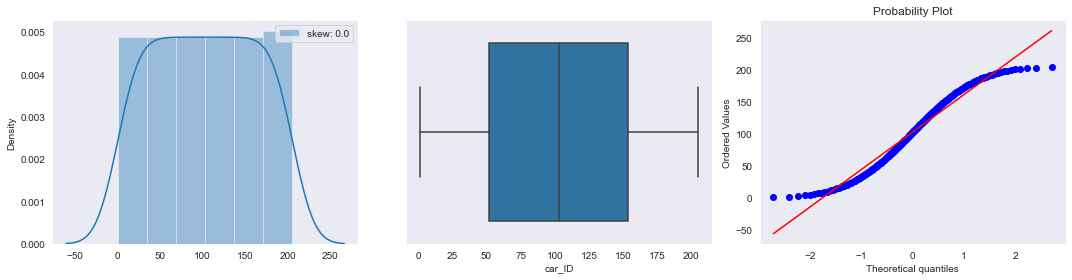

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


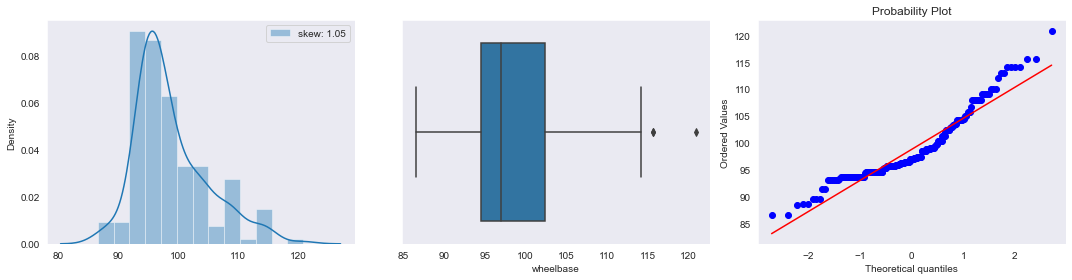

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


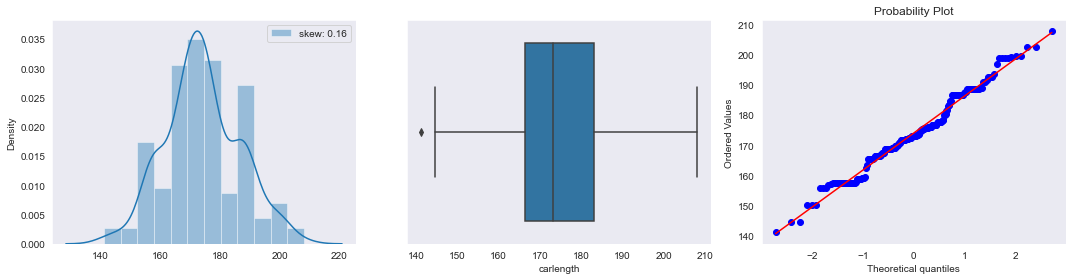

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


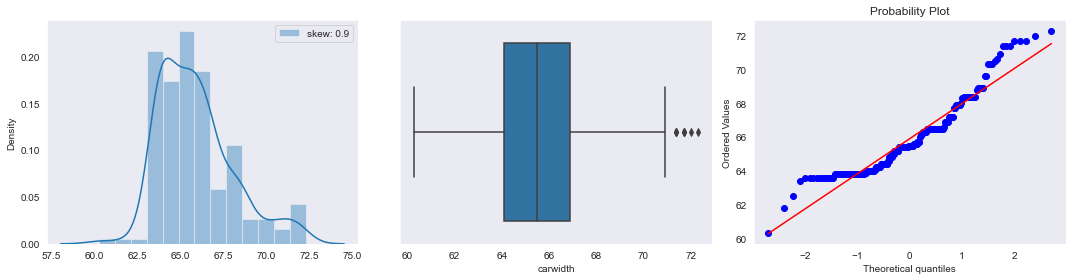

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


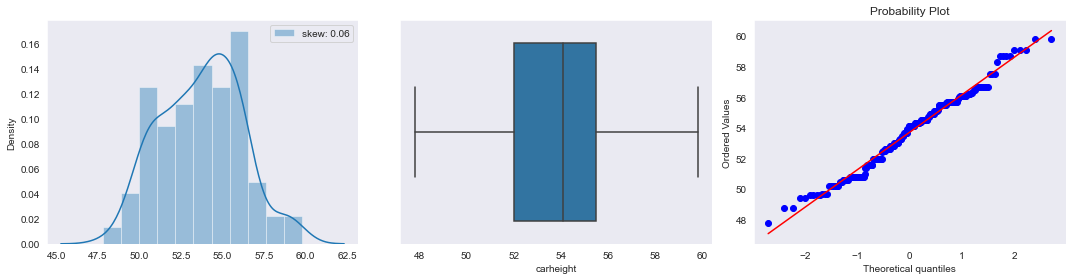

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


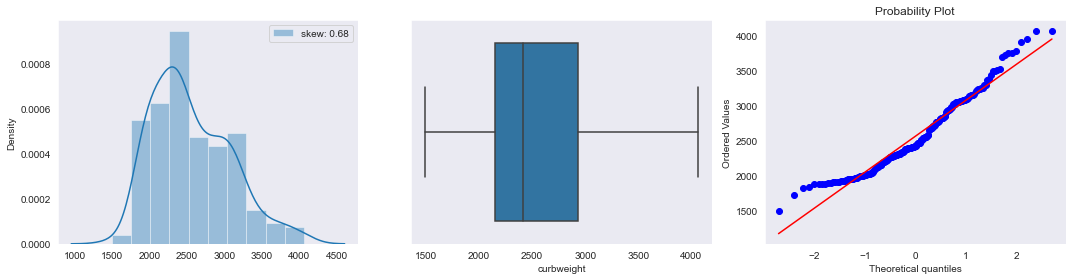

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


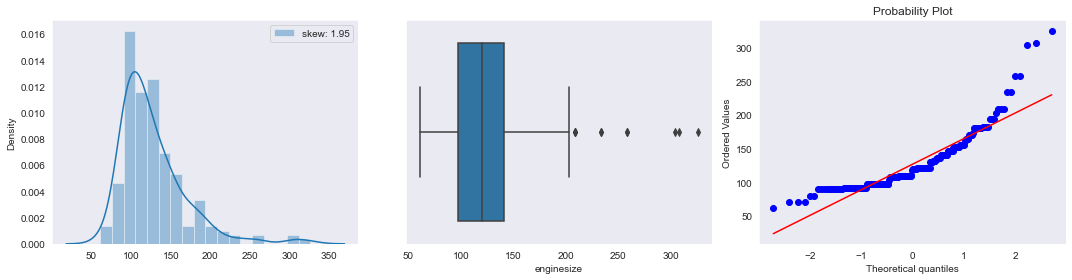

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


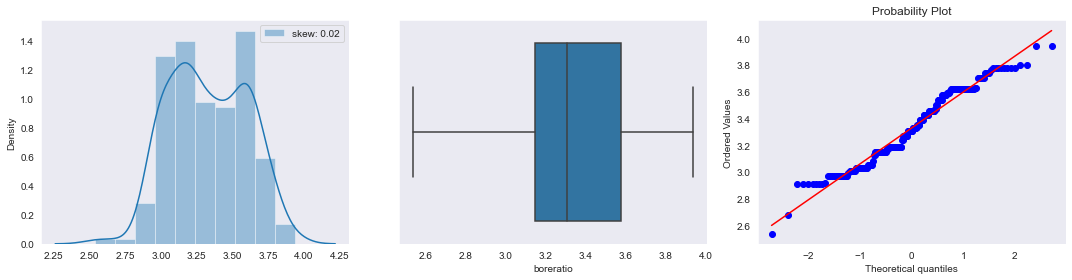

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


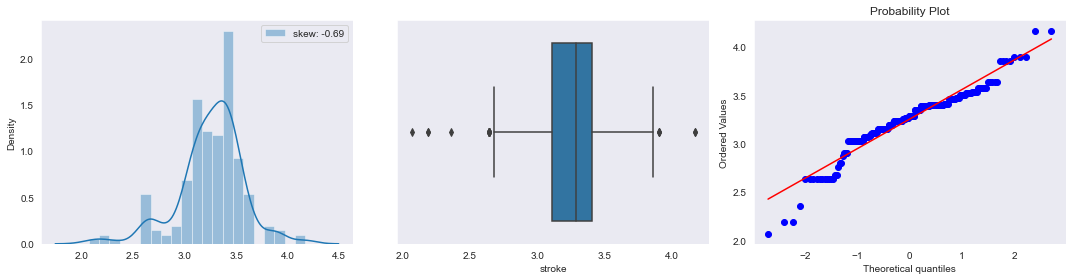

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


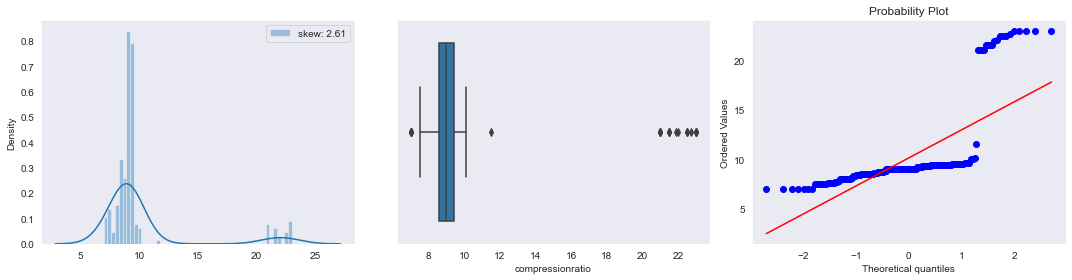

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


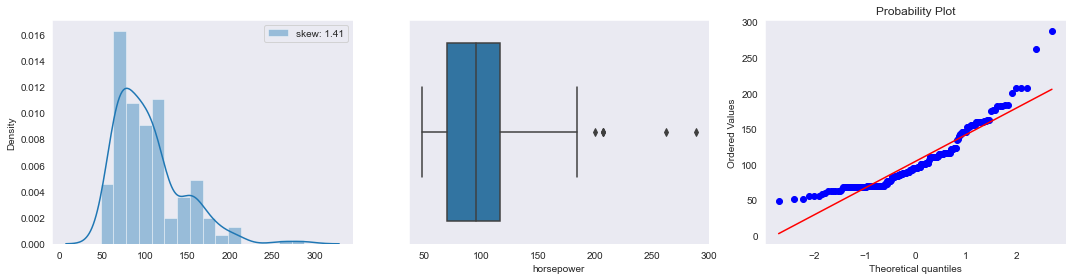

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


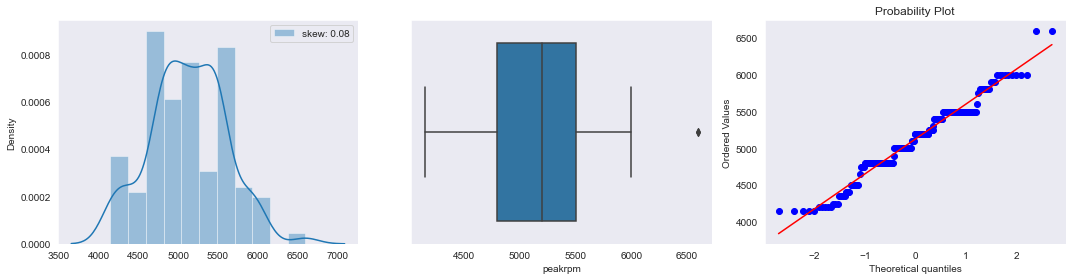

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


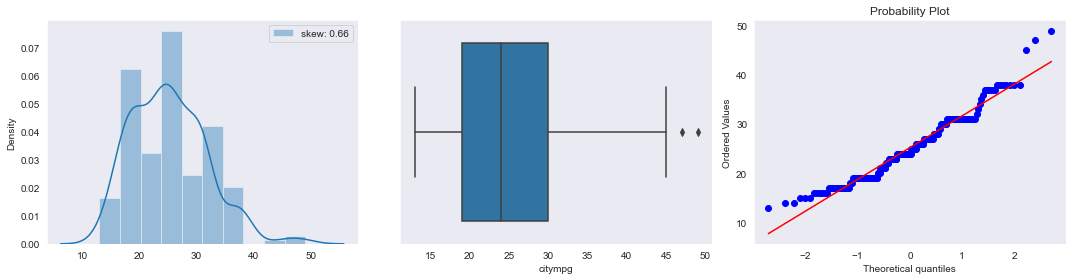

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


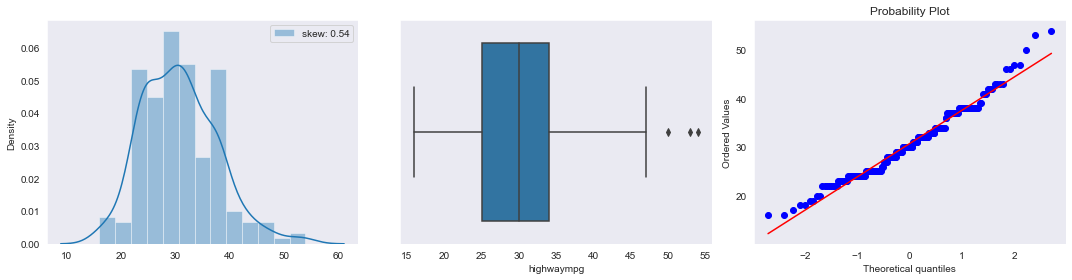

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


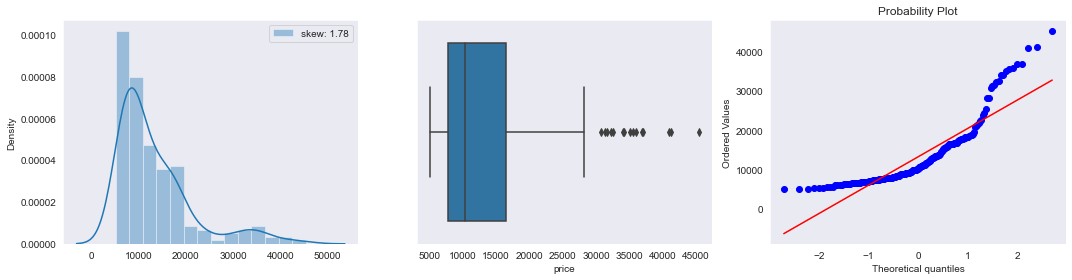

In [43]:
# plotting graph for each variables to understand outliers
from scipy import stats

df=cars
sns.set_style('dark')
for col in cars.describe().columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(x=df[col], label='skew: ' + str(np.round(df[col].skew(),2)), kde=True)
    plt.legend()
    plt.subplot(132)
    sns.boxplot(x=df[col])
    plt.subplot(133)
    stats.probplot(x=df[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [44]:
# finding skew before and after to compare the shape after treatment
# we can use SD, IQR, SKEW etc

for x in cars.describe().columns:
    print('The skewness and Max_Z-Score value for {} is {} and {} respectively'.format(x, cars[x].skew(), np.max(abs(stats.zscore(cars[x])))))

The skewness and Max_Z-Score value for car_ID is 0.0 and 1.7236222864675912 respectively
The skewness and Max_Z-Score value for wheelbase is 1.0502137758714858 and 3.6862252135740365 respectively
The skewness and Max_Z-Score value for carlength is 0.1559537713215604 and 2.766741434550069 respectively
The skewness and Max_Z-Score value for carwidth is 0.904003498786254 and 2.98705556854827 respectively
The skewness and Max_Z-Score value for carheight is 0.06312273247192804 and 2.492301615471819 respectively
The skewness and Max_Z-Score value for curbweight is 0.681398189052588 and 2.9079877723438705 respectively
The skewness and Max_Z-Score value for enginesize is 1.9476550452788108 and 4.7926789111561625 respectively
The skewness and Max_Z-Score value for boreratio is 0.02015641810424137 and 2.9230489468762504 respectively
The skewness and Max_Z-Score value for stroke is -0.6897045784233837 and 3.7893106699169268 respectively
The skewness and Max_Z-Score value for compressionratio is 2

In [45]:
cars['enginesize'].quantile([0.01, 0.05, 0.25, 0.5,0.75, 0.9, 0.95, 0.99, 1])

0.01     70.00
0.05     90.00
0.25     97.00
0.50    120.00
0.75    141.00
0.90    181.00
0.95    201.20
0.99    302.16
1.00    326.00
Name: enginesize, dtype: float64

In [46]:
cars.nunique()

car_ID              205
symboling             6
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
car_company          22
dtype: int64

If needed to treat outlier then use the below method: IQR

In [47]:
# col_sel = ['compressionratio', 'enginesize', 'carwidth, 'wheelbase]
# def iqr_capping(df, cols, factor):
#     for col in cols:
        
#         q1 = df[col].quantile(0.25)
#         q3 = df[col].quantile(0.75)
        
#         iqr = q3-q1
        
#         upper_whisker = q3 + (factor*iqr)
#         lower_whisker = q1 - (factor*iqr)
        
#         df[col] = np.where(df[col]>upper_whisker, upper_whisker,
#                           np.where(df[col]<lower_whisker, lower_whisker, df[col]))

# iqr_capping(cars, col_sel, 1.5)
#here we are the capping our outliers with upper whisker and lower whisker values


In [48]:

# df['flag'] = np.where(df.fruit.str.contains("apple"), 1, # if fruit == 'apple', set 1
#                      np.where(df.color.str.contains("yellow"), 1, 0)) #else if color has 'yellow' set 1, else set 0

In [49]:
# finding skew before and after to compare the shape after treatment
# we can use SD, IQR, SKEW etc.

# for x in cars.describe().columns:
#     print('The skewness and Max_Z-Score value for {} is {} and {} respectively'.format(x, cars[x].skew(), np.max(abs(stats.zscore(cars[x])))))

DATA PREPARATION

Lets now prepare the data and build the model

In [50]:
# split into X and y
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
                 'carbody','drivewheel', 'enginelocation', 'wheelbase', 'carlength',
                'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
                'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
                'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'car_company']]

y = cars['price']

In [51]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [52]:
# creating dummy variables for categorical variables

#subset all categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [53]:
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()
# drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables.
# Let’s say we have 3 types of values in Categorical column and we want to create dummy variable for that column. If one variable is not furnished and semi_furnished, then It is obvious unfurnished. So we do not need 3rd variable to identify the unfurnished.

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# drop categorical variables
X = X.drop(list(cars_categorical.columns), axis=1)

In [55]:
# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)

In [56]:
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


VIF calculation

In [57]:
# Let's check multicollinearity 
# to calculate VIF we can use the loop
#In this we will find the feature with highest vif then
#drop that column and again we will run the method and 
#drop the column with highest vif value(if there is)
Default_indep = X

import statsmodels.api as sm
features = list(Default_indep.columns)
for i in range(0, len(Default_indep.columns)):
    x = Default_indep.loc[:,Default_indep.columns!=features[i]]
    y1 = Default_indep.loc[:,Default_indep.columns==features[i]]
    model=sm.OLS(y1,x)
    results=model.fit()
    
    rsq=results.rsquared
    vif = round(1/(1-rsq),2)
    print("R-sqr value of {} is {}".format(features[i], rsq))
    print('VIF for {} is {}'.format(features[i], vif))

R-sqr value of wheelbase is 0.9533633472207845
VIF for wheelbase is 21.44
R-sqr value of carlength is 0.9615520802614562
VIF for carlength is 26.01
R-sqr value of carwidth is 0.9411213147203537
VIF for carwidth is 16.98
R-sqr value of carheight is 0.8753807839476153
VIF for carheight is 8.02
R-sqr value of curbweight is 0.9807163556898695
VIF for curbweight is 51.86
R-sqr value of enginesize is 0.9873747570755251
VIF for enginesize is 79.21
R-sqr value of boreratio is 0.9418444837825324
VIF for boreratio is 17.2
R-sqr value of stroke is 0.8512704421600655
VIF for stroke is 6.72
R-sqr value of compressionratio is 0.9962659027271956
VIF for compressionratio is 267.8
R-sqr value of horsepower is 0.9844179641794818
VIF for horsepower is 64.18
R-sqr value of peakrpm is 0.8706150744058966
VIF for peakrpm is 7.73
R-sqr value of citympg is 0.9808509717996745
VIF for citympg is 52.22
R-sqr value of highwaympg is 0.9771191155287562
VIF for highwaympg is 43.7
R-sqr value of symboling_-1 is 0.9061

<ipython-input-57-eee7a6a35699>:17: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1/(1-rsq),2)


R-sqr value of enginelocation_rear is 1.0
VIF for enginelocation_rear is inf
R-sqr value of enginetype_dohcv is 0.8638802611649832
VIF for enginetype_dohcv is 7.35
R-sqr value of enginetype_l is 1.0
VIF for enginetype_l is inf
R-sqr value of enginetype_ohc is 0.9521125438876082
VIF for enginetype_ohc is 20.88
R-sqr value of enginetype_ohcf is 1.0
VIF for enginetype_ohcf is inf
R-sqr value of enginetype_ohcv is 0.8520342523777195
VIF for enginetype_ohcv is 6.76
R-sqr value of enginetype_rotor is 1.0
VIF for enginetype_rotor is inf
R-sqr value of cylindernumber_five is 0.96377253209264
VIF for cylindernumber_five is 27.6
R-sqr value of cylindernumber_four is 0.9931243342126276
VIF for cylindernumber_four is 145.44
R-sqr value of cylindernumber_six is 0.9800822995963218
VIF for cylindernumber_six is 50.21
R-sqr value of cylindernumber_three is 1.0
VIF for cylindernumber_three is inf
R-sqr value of cylindernumber_twelve is 0.8869304946463006
VIF for cylindernumber_twelve is 8.84
R-sqr valu

We see high multicollinearity with features, can treat them with PCA or iterative method

In [58]:
# #scaling the features
from sklearn.preprocessing import scale

# #storing column names in cols, since column names are (annoyingly) lost after
# #scaling(the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',


In [59]:
X

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.238120
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.238120
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.238120
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.238120
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.238120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,4.199567
201,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,4.199567
202,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,4.199567
203,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,4.199567


In [60]:
#split into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=1)

In [61]:
y_train

14     24565.0
162     9258.0
59      8845.0
19      6295.0
177    11248.0
        ...   
133    12170.0
137    18620.0
72     35056.0
140     7603.0
37      7895.0
Name: price, Length: 153, dtype: float64

In [62]:
y_test

78      6669.0
97      7999.0
151     6338.0
44      8916.5
40     10295.0
67     25552.0
98      8249.0
18      5151.0
152     6488.0
62     10245.0
4      17450.0
172    17669.0
197    16515.0
38      9095.0
29     12964.0
170    11199.0
190     9980.0
33      6529.0
136    18150.0
145    11259.0
173     8948.0
31      6855.0
11     16925.0
119     7957.0
169     9989.0
34      7129.0
84     14489.0
184     7995.0
120     6229.0
35      7295.0
163     8058.0
28      8921.0
16     41315.0
130     9295.0
116    17950.0
182     7775.0
27      8558.0
47     32250.0
58     15645.0
204    22625.0
138     5118.0
106    18399.0
90      7099.0
147    10198.0
185     8195.0
95      7799.0
73     40960.0
51      6095.0
117    18150.0
103    13499.0
69     28176.0
107    11900.0
Name: price, dtype: float64

MODEL BUILDING AND EVALUATION

In [63]:
# fitting a linear model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
# for i in range(len(x_train.columns)):
#     print("The coeff of {} variable is {}".format(x_train.columns[i], lm.coef_[i]))
#     print("The coeff of {} variable is {}".format('intercept', lm.intercept_[0]))
    
# model.coef_[1]


LinearRegression()

In [64]:
print(lm.coef_)

[ 1.89265972e+03 -2.42072589e+03  2.28834671e+03 -1.91325005e+02
  1.60287441e+03  3.21002228e+03 -9.37674199e+02 -6.35654610e+02
 -4.12258496e+03  6.29203798e+02  3.53166675e+02  7.61148184e+01
  9.16192555e+01  1.75324167e+01  8.07301444e+02  7.89299262e+02
  5.42619239e+02  3.24790383e+02 -5.75514927e+15  2.70271728e+02
 -6.53456572e+02 -4.39710155e+02 -1.11975642e+03 -1.05916936e+03
 -8.09393900e+02 -2.48970332e+02  4.40934574e+02  2.63730837e+15
 -3.17146421e+02 -6.10599022e+15 -2.80852566e+02 -5.71935469e+15
 -5.69165135e+02 -1.29104586e+16 -7.83000000e+02 -2.54687500e+02
 -5.86500000e+02 -1.47929125e+15 -2.50656250e+02 -3.73074146e+15
  1.28150000e+03  1.44475075e+16 -5.75514927e+15 -9.66578645e+13
  1.30250000e+03  4.60000000e+02  2.17500000e+02  4.50000000e+01
  8.67000000e+02  8.49750000e+02 -4.80250000e+02 -9.41843750e+02
 -2.90000000e+02 -3.69062500e+02  2.88000000e+02 -7.65750000e+02
 -3.61625000e+02 -1.09450000e+03 -7.22250000e+02  5.86116617e+15
 -7.24500000e+02  6.01750

In [65]:
Coef_df = pd.DataFrame(zip(x_train.columns, lm.coef_))
Coef_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
1,1892.659715,-2420.725888,2288.346708,-191.325005,1602.874409,3210.022283,-937.674199,-635.65461,-4122.584962,629.203798,...,-722.25,5861166168669501.0,-724.5,601.75,-214.5,148.0,5155774070130342.0,-1268.5,-505.25,-309.5


In [66]:
print(lm.intercept_)

-824106530219397.2


In [67]:
# get all the model performance parameters
# we can get train error

y_train_pred = lm.predict(x_train)

from sklearn import metrics

mean_l1_error_train = metrics.mean_absolute_error(y_train, y_train_pred)
mean_l2_error_train = metrics.mean_squared_error(y_train, y_train_pred)
Rootmean_l2_error_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

train_accuracy = lm.score(x_train, y_train)
# lm.score(x_train, y_train) same as above
print("mean_l1_error_train is {}\n mean_l2_error_train is {}\n Rootmean_l2_error_train is {}\n and accuracy is {}".format(mean_l1_error_train, mean_l2_error_train, Rootmean_l2_error_train, train_accuracy))

mean_l1_error_train is 993.1631241830064
 mean_l2_error_train is 1540305.6531536863
 Rootmean_l2_error_train is 1241.0905096541856
 and accuracy is 0.9752344017954626


In [68]:
y_test.min(), y_test.max()

(5118.0, 41315.0)

In [69]:
y_train.min(), y_train.max()

(5195.0, 45400.0)

In [70]:
lm.score(x_test, y_test)

-4.7857001224719266e+24

In [71]:
y_test_pred = lm.predict(x_test)
y_test_pred.max(), y_test_pred.min()

(44411.25, -1.2031242448166266e+17)

In [72]:
# model parameters and anova
x_train_final = sm.add_constant(x_train)
model_object = sm.OLS(y_train, x_train_final)
model = model_object.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     59.25
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           1.77e-53
Time:                        23:32:44   Log-Likelihood:                -1306.4
No. Observations:                 153   AIC:                             2737.
Df Residuals:                      91   BIC:                             2925.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
wheelbase               1892

In [73]:
# statistically important feature means the beta-value will never be 0
# boreratio is not a statistically imp feature because 
# our null hypotheses is that beta is equal to 0
# and our t-test-score is 0.066 which is greater than 5%
#significance value so we fail to reject our hypothesis
#or from the confidence interval(i.e from -7166 to 238), we can say 
#beta value can be 0 so its not a statistically imp feature

In [74]:
DF_y_train_pred = pd.DataFrame(y_train_pred,columns=['price_predict'])
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
DF_y_train_pred.reset_index(drop=True, inplace=True)

Train_with_pred=pd.concat([x_train, y_train, DF_y_train_pred], axis=1)
Train_with_pred

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo,price,price_predict
0,0.789639,1.214799,0.463650,0.810288,0.961544,0.892917,-0.073121,-0.209105,-0.288349,0.427984,...,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,-0.430083,-0.249351,-0.23812,24565.0,23924.75
1,-0.508831,-0.629655,-0.704593,-0.379429,-0.800075,-0.695874,-0.517266,-0.720563,-0.288349,-0.864871,...,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,2.325134,-0.249351,-0.23812,9258.0,7993.75
2,0.007227,0.304760,0.276731,-0.010206,-0.328385,-0.118132,0.222975,0.430217,-0.389299,-0.509970,...,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,-0.430083,-0.249351,-0.23812,8845.0,9892.25
3,-0.708596,-1.474692,-1.078431,-0.707626,-1.312196,-0.888455,-1.109459,-0.464834,-0.136923,-0.864871,...,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,-0.430083,-0.249351,-0.23812,6295.0,5891.25
4,0.606521,0.126002,0.276731,0.071843,-0.187840,-0.118132,-0.073121,0.909709,-0.364062,-0.307169,...,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,2.325134,-0.249351,-0.23812,11248.0,9965.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.057168,1.019791,0.276731,0.974387,0.268448,-0.142204,0.778156,-0.592699,-0.212636,0.149133,...,-0.188025,-0.158114,-0.099258,5.759051,-0.249351,-0.430083,-0.249351,-0.23812,12170.0,13769.75
149,0.057168,1.019791,0.276731,0.974387,0.561088,-0.142204,0.778156,-0.592699,-0.288349,1.416637,...,-0.188025,-0.158114,-0.099258,5.759051,-0.249351,-0.430083,-0.249351,-0.23812,18620.0,16813.75
150,-0.359008,0.507894,2.145920,-1.199923,2.174461,2.578000,0.482059,-0.496800,-0.465012,1.289887,...,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,-0.430083,-0.249351,-0.23812,35056.0,36217.25
151,-0.908360,-1.360937,-0.984972,0.810288,-0.607548,-0.455148,1.074252,-1.967242,-0.364062,-0.788820,...,-0.188025,-0.158114,-0.099258,-0.173640,4.010403,-0.430083,-0.249351,-0.23812,7603.0,6876.00


In [75]:
y_test_pred-y_test

78    -5.222500e+02
97    -2.028250e+03
151    3.517500e+02
44    -1.454750e+03
40    -4.773250e+03
67     3.445750e+03
98    -2.040250e+03
18    -4.724210e+16
152    1.441750e+03
62     1.068250e+03
4     -9.687500e+02
172   -3.474750e+03
197   -1.900250e+03
38    -8.807500e+02
29    -1.387318e+15
170   -1.097500e+02
190   -2.072500e+03
33     1.627250e+03
136   -3.546750e+03
145    8.117500e+02
173    8.207500e+02
31    -4.447500e+02
11     2.579250e+03
119    1.092250e+03
169    6.142500e+02
34     1.076250e+03
84    -1.640250e+03
184    1.402500e+03
120    1.138250e+03
35     6.592500e+02
163   -1.052250e+03
28    -1.083250e+03
16    -1.271725e+04
130    7.587500e+02
116   -1.419250e+03
182    2.945000e+02
27     7.012500e+02
47     3.504250e+03
58    -1.203124e+17
204   -3.506250e+03
138    4.567500e+02
106   -2.072500e+02
90     4.987500e+02
147   -1.339250e+03
185    2.060000e+03
95    -2.140250e+03
73     3.451250e+03
51     6.492500e+02
117   -7.432500e+02
103    1.645750e+03


In [76]:
# get the model tested on test data
y_pred = lm.predict(x_test)

from sklearn import metrics

mean_l1_error_test = metrics.mean_absolute_error(y_test, y_test_pred)
mean_l2_error_test = metrics.mean_squared_error(y_test, y_test_pred)
Rootmean_l2_error_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_accuracy = lm.score(x_test, y_test)

print("mean_l1_error_test is {}\n mean_l2_error_test is {}\n Rootmean_l2_error_test is {}\n and accuracy is {}".format(mean_l1_error_test, mean_l2_error_test, Rootmean_l2_error_test, test_accuracy))

mean_l1_error_test is 3248881513418589.5
 mean_l2_error_test is 3.2132345778563697e+32
 Rootmean_l2_error_test is 1.7925497420870556e+16
 and accuracy is -4.7857001224719266e+24


In [77]:
LinearRegression.score?

In [78]:
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

-4.7857001224719266e+24


In [79]:
y_test

78      6669.0
97      7999.0
151     6338.0
44      8916.5
40     10295.0
67     25552.0
98      8249.0
18      5151.0
152     6488.0
62     10245.0
4      17450.0
172    17669.0
197    16515.0
38      9095.0
29     12964.0
170    11199.0
190     9980.0
33      6529.0
136    18150.0
145    11259.0
173     8948.0
31      6855.0
11     16925.0
119     7957.0
169     9989.0
34      7129.0
84     14489.0
184     7995.0
120     6229.0
35      7295.0
163     8058.0
28      8921.0
16     41315.0
130     9295.0
116    17950.0
182     7775.0
27      8558.0
47     32250.0
58     15645.0
204    22625.0
138     5118.0
106    18399.0
90      7099.0
147    10198.0
185     8195.0
95      7799.0
73     40960.0
51      6095.0
117    18150.0
103    13499.0
69     28176.0
107    11900.0
Name: price, dtype: float64

In [80]:
x_test

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
78,-0.841772,-1.360937,-0.704593,-1.199923,-1.061911,-0.840310,-1.331531,-0.081241,-0.187398,-0.915571,...,-0.310253,-0.238120,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,-0.430083,-0.249351,-0.238120
97,-0.708596,-0.312767,-0.984972,-0.092256,-0.998377,-0.719947,-0.665314,0.110556,-0.187398,-0.890221,...,3.223180,-0.238120,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,-0.430083,-0.249351,-0.238120
151,-0.508831,-1.247182,-1.078431,0.317992,-0.992601,-0.840310,-1.035435,-0.720563,-0.288349,-1.067671,...,-0.310253,-0.238120,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,2.325134,-0.249351,-0.238120
44,-0.708596,-1.474692,-1.078431,-0.707626,-1.312196,-0.888455,-1.109459,-0.464834,-0.136923,-0.864871,...,-0.310253,-0.238120,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,-0.430083,-0.249351,-0.238120
40,-0.375655,0.109752,-1.592458,0.153893,-0.353413,-0.407003,-0.665314,1.037573,-0.288349,-0.459269,...,-0.310253,-0.238120,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,-0.430083,-0.249351,-0.238120
67,1.871697,1.369181,2.052461,1.138486,1.847166,1.350297,0.926204,1.229370,2.866352,0.478684,...,-0.310253,-0.238120,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,-0.430083,-0.249351,-0.238120
98,-0.608714,-0.946544,-0.984972,-0.174305,-1.054210,-0.719947,-0.665314,0.110556,-0.187398,-0.890221,...,3.223180,-0.238120,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,-0.430083,-0.249351,-0.238120
18,-1.724066,-2.677244,-2.620512,-0.215330,-2.055348,-1.586561,-1.553603,-0.720563,-0.162161,-1.422573,...,-0.310253,-0.238120,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,-0.430083,-0.249351,-0.238120
152,-0.508831,-1.247182,-1.078431,0.317992,-1.040733,-0.840310,-1.035435,-0.720563,-0.288349,-1.067671,...,-0.310253,-0.238120,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,2.325134,-0.249351,-0.238120
62,0.007227,0.304760,0.276731,0.728239,-0.280253,-0.118132,0.222975,0.430217,-0.389299,-0.509970,...,-0.310253,-0.238120,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,-0.430083,-0.249351,-0.238120


In [81]:
DF_y_test_pred = pd.DataFrame(y_test_pred,columns=['price_predict'])
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
DF_y_test_pred.reset_index(drop=True, inplace=True)

Test_with_pred=pd.concat([x_test, y_test, DF_y_test_pred], axis=1)
Test_with_pred

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo,price,price_predict
0,-0.841772,-1.360937,-0.704593,-1.199923,-1.061911,-0.840310,-1.331531,-0.081241,-0.187398,-0.915571,...,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,-0.430083,-0.249351,-0.238120,6669.0,6.146750e+03
1,-0.708596,-0.312767,-0.984972,-0.092256,-0.998377,-0.719947,-0.665314,0.110556,-0.187398,-0.890221,...,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,-0.430083,-0.249351,-0.238120,7999.0,5.970750e+03
2,-0.508831,-1.247182,-1.078431,0.317992,-0.992601,-0.840310,-1.035435,-0.720563,-0.288349,-1.067671,...,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,2.325134,-0.249351,-0.238120,6338.0,6.689750e+03
3,-0.708596,-1.474692,-1.078431,-0.707626,-1.312196,-0.888455,-1.109459,-0.464834,-0.136923,-0.864871,...,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,-0.430083,-0.249351,-0.238120,8916.5,7.461750e+03
4,-0.375655,0.109752,-1.592458,0.153893,-0.353413,-0.407003,-0.665314,1.037573,-0.288349,-0.459269,...,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,-0.430083,-0.249351,-0.238120,10295.0,5.521750e+03
5,1.871697,1.369181,2.052461,1.138486,1.847166,1.350297,0.926204,1.229370,2.866352,0.478684,...,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,-0.430083,-0.249351,-0.238120,25552.0,2.899775e+04
6,-0.608714,-0.946544,-0.984972,-0.174305,-1.054210,-0.719947,-0.665314,0.110556,-0.187398,-0.890221,...,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,-0.430083,-0.249351,-0.238120,8249.0,6.208750e+03
7,-1.724066,-2.677244,-2.620512,-0.215330,-2.055348,-1.586561,-1.553603,-0.720563,-0.162161,-1.422573,...,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,-0.430083,-0.249351,-0.238120,5151.0,-4.724210e+16
8,-0.508831,-1.247182,-1.078431,0.317992,-1.040733,-0.840310,-1.035435,-0.720563,-0.288349,-1.067671,...,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,2.325134,-0.249351,-0.238120,6488.0,7.929750e+03
9,0.007227,0.304760,0.276731,0.728239,-0.280253,-0.118132,0.222975,0.430217,-0.389299,-0.509970,...,-0.188025,-0.158114,-0.099258,-0.173640,-0.249351,-0.430083,-0.249351,-0.238120,10245.0,1.131325e+04


Model Building Using RFE
Let's now build a model using recursive features elimination to select features. We'll first start off with an arbitrary number of features and then use the statsmodels library to build models using the shortlisted features(this is also because sklearn doesn't have adjusted r-squared, which statsmodel has)

In [82]:
#RFE will remove features by looking at correlation 
#between dependent and independent features
#RFE with 15 means 1st highest 15 correlated features

In [83]:
#RFE with 15 features
from sklearn.feature_selection import RFE

#RFE with 15 features
lm = LinearRegression()
rfe_15 = RFE(lm, n_features_to_select=15)

#fit with 15 features
rfe_15.fit(x_train, y_train)

#printing the boolean results
print(rfe_15.support_)
print(rfe_15.ranking_)

[ True  True  True False  True False False False False  True False False
 False False False False False False False False False  True  True  True
  True False False  True False False False False False False False False
 False False False False False False False False False False False False
  True  True False False False False  True False False False False  True
 False  True False False False False False False]
[ 1  1  1 46  1  6  5  9 16  1 38 49 51 54 13 14 17 24 15 43 23  1  1  1
  1 47 11  1  8 12 45 41 18 37  3  2  4 52  7 40 29 28 10 53 26 42 44 50
  1  1 33 27 34 36  1 30 22 21 32  1 31  1 39 48 19 20 25 35]


In [84]:
#making predictions using rfe model
y_pred = rfe_15.predict(x_test)

#r-squared
print(metrics.r2_score(y_test, y_pred))

0.8868330276703639


In [85]:
# RFE with 6 features
from sklearn.feature_selection import RFE

#RFE with 6 features
lm = LinearRegression()
rfe_6 = RFE(lm, n_features_to_select=6)

#fit with 15 features
rfe_6.fit(x_train, y_train)

#printing the boolean results
print(rfe_6.support_)
print(rfe_6.ranking_)

[False False  True False  True False False False False  True False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
  True  True False False False False False False False False False False
 False False False False False False False False]
[ 8  7  1 55  1 15 14 18 25  1 47 58 60 63 22 23 26 33 24 52 32  9  4  5
  3 56 20  1 17 21 54 50 27 46 12 11 13 61 16 49 38 37 19 62 35 51 53 59
  1  1 42 36 43 45  2 39 31 30 41 10 40  6 48 57 28 29 34 44]


In [86]:
#making predictions using rfe model
y_pred = rfe_6.predict(x_test)

#r-squared
print(metrics.r2_score(y_test, y_pred))

0.8765095144771371


RFE with 6 features is giving about 87.65 r2 as compared to
88.7 with 15 features. It's not worth it to take more 9 features for jsut a slight better performance
It would be better to check for adjusted r-square as it penalises a model for having more features

Model Building and Evaluation

In [87]:
#subset the features selected by rfe_15
col_15 = x_train.columns[rfe_15.support_]

#subsetting training data for 15 selected columns
X_train_rfe_15 = x_train[col_15]

#add a constant to the model
X_train_rfe_15 = sm.add_constant(X_train_rfe_15)
X_train_rfe_15.head()

,const,wheelbase,carlength,carwidth,curbweight,horsepower,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_rear,car_company_bmw,car_company_buick,car_company_jaguar,car_company_peugeot,car_company_porsche
0,1.0,0.789639,1.214799,0.463650,0.961544,0.427984,-0.201517,-0.720082,1.065559,-0.372678,-0.121867,4.962358,-0.201517,-0.121867,-0.23812,-0.158114
1,1.0,-0.508831,-0.629655,-0.704593,-0.800075,-0.864871,-0.201517,-0.720082,1.065559,-0.372678,-0.121867,-0.201517,-0.201517,-0.121867,-0.23812,-0.158114
2,1.0,0.007227,0.304760,0.276731,-0.328385,-0.509970,-0.201517,1.388730,-0.938474,-0.372678,-0.121867,-0.201517,-0.201517,-0.121867,-0.23812,-0.158114
3,1.0,-0.708596,-1.474692,-1.078431,-1.312196,-0.864871,-0.201517,1.388730,-0.938474,-0.372678,-0.121867,-0.201517,-0.201517,-0.121867,-0.23812,-0.158114
4,1.0,0.606521,0.126002,0.276731,-0.187840,-0.307169,-0.201517,1.388730,-0.938474,-0.372678,-0.121867,-0.201517,-0.201517,-0.121867,-0.23812,-0.158114


In [88]:
#fitting the model with 15 variables 
lm_15 = sm.OLS(y_train, X_train_rfe_15).fit()
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     173.1
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           4.21e-81
Time:                        23:32:45   Log-Likelihood:                -1361.0
No. Observations:                 153   AIC:                             2754.
Df Residuals:                     137   BIC:                             2802.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.319e+04    

In [89]:
#making predictions using rfe_15 sm model
X_test_rfe_15 = x_test[col_15]

X_test_rfe_15 = sm.add_constant(X_test_rfe_15, has_constant='add')
X_test_rfe_15.info()

#making predictions
y_pred = lm_15.predict(X_test_rfe_15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                52 non-null     float64
 1   wheelbase            52 non-null     float64
 2   carlength            52 non-null     float64
 3   carwidth             52 non-null     float64
 4   curbweight           52 non-null     float64
 5   horsepower           52 non-null     float64
 6   carbody_hardtop      52 non-null     float64
 7   carbody_hatchback    52 non-null     float64
 8   carbody_sedan        52 non-null     float64
 9   carbody_wagon        52 non-null     float64
 10  enginelocation_rear  52 non-null     float64
 11  car_company_bmw      52 non-null     float64
 12  car_company_buick    52 non-null     float64
 13  car_company_jaguar   52 non-null     float64
 14  car_company_peugeot  52 non-null     float64
 15  car_company_porsche  52 non-null     float

In [90]:
metrics.r2_score(y_test, y_pred)

0.8868330276703635

In [91]:
#let's compare for the model with 6 features

In [92]:
#subset the features selected by rfe_6
col_6 = x_train.columns[rfe_6.support_]

#subsetting training data for 15 selected columns
X_train_rfe_6 = x_train[col_6]

#add a constant to the model
X_train_rfe_6 = sm.add_constant(X_train_rfe_6)
X_train_rfe_6.head()

,const,carwidth,curbweight,horsepower,enginelocation_rear,car_company_bmw,car_company_buick
0,1.0,0.463650,0.961544,0.427984,-0.121867,4.962358,-0.201517
1,1.0,-0.704593,-0.800075,-0.864871,-0.121867,-0.201517,-0.201517
2,1.0,0.276731,-0.328385,-0.509970,-0.121867,-0.201517,-0.201517
3,1.0,-1.078431,-1.312196,-0.864871,-0.121867,-0.201517,-0.201517
4,1.0,0.276731,-0.187840,-0.307169,-0.121867,-0.201517,-0.201517
